<a href="https://colab.research.google.com/github/aubricot/object_detection_for_image_cropping/blob/master/COLAB_crop_coords_display_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test display of EOL image crop coordinates generated using object detection
---
*Last Updated 6 December 2019*   
Bounding boxes resulting from object detection using YOLO were converted to square dimensions and padded to be used as crop coordinates for EOL images.

This notebook is meant to be run enitrely in Google Colab and doesn't require any software installations or downloads to your local machine. To get started, just click the "Open in Colab" button. 

## Imports
---


In [0]:
# for importing data and images
import numpy as np 
import pandas as pd
import urllib

# for drawing on images
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [15]:
# Mount google drive to export detection results as tsv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Read in crops.tsv from Google Drive to dataframe
df = pd.read_csv('/content/drive/My Drive/fall19_smithsonian_informatics/bird_crops_yolo_1000img_display_test.tsv', delimiter='\t')
print(df.head())

                                         eolMediaURL  ...  dataObjectVersionID
0  https://content.eol.org/data/media/54/80/e0/76...  ...              5135789
1  https://content.eol.org/data/media/54/81/72/76...  ...              5136951
2  https://content.eol.org/data/media/54/86/01/76...  ...              5136492
3  https://content.eol.org/data/media/54/88/8d/76...  ...              5139333
4  https://content.eol.org/data/media/7c/03/c1/26...  ...              8502870

[5 rows x 11 columns]


In [0]:
# For uploading an image from url
# Modified from https://www.pyimagesearch.com/2015/03/02/convert-url-to-image-with-python-and-opencv/
def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
  return image

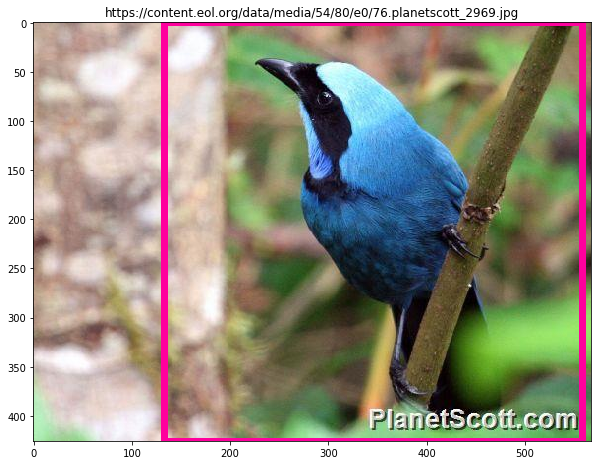

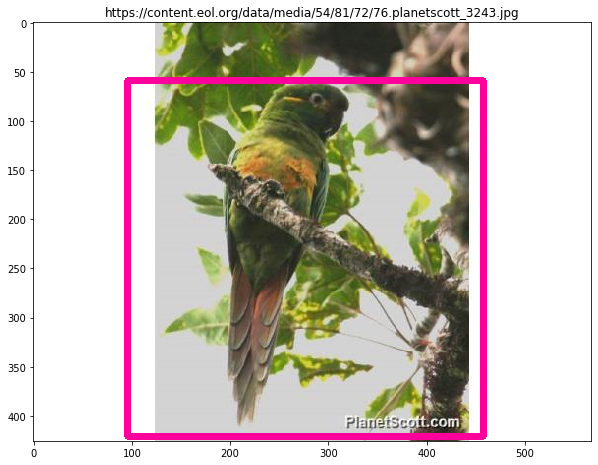

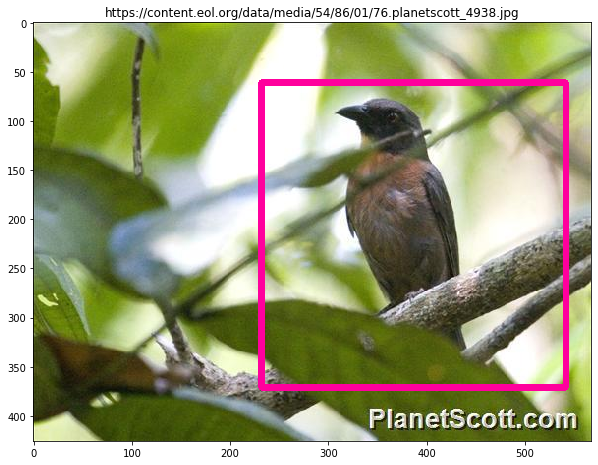

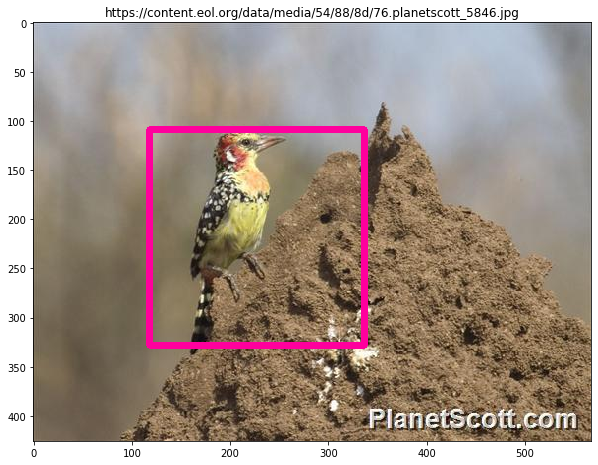

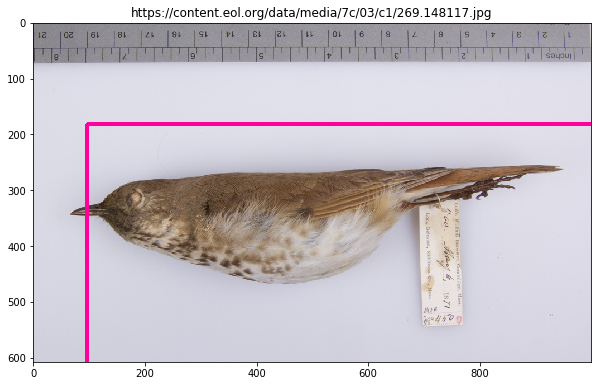

In [28]:
# Display crop dimensions on images
for i, row in df.head(5).iterrows():
  # read in image 
  url = df['eolMediaURL'][i]
  img = url_to_image(url)

  # Create rectangle 
  image_wbox = cv2.rectangle(img, (df['xmin'][i], df['ymin'][i]), (df['xmin'][i] + df['crop_width'][i], 
                                                      df['ymin'][i] + df['crop_height'][i]), 
                                                      (255, 0, 157), 5) 
  
  #cv2_imshow(img) 

  # Plot and show detection boxes on images
  _, ax = plt.subplots(figsize=(10, 10))
  ax.imshow(image_wbox)
  plt.title('{}'.format(url))
  
  # Allows us to see image 
  # until closed forcefully 
  #cv2.waitKey(0) 
  #cv2.destroyAllWindows() 